In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

import os

In [2]:
#Load Pickles
review1_df = pd.read_pickle('./review1_df.pkl')
business_df = pd.read_pickle('./business_df.pkl')
user_df = pd.read_pickle('./user_df.pkl')

In [3]:
#Filter Businesses
business_df = business_df[business_df['categories'].str.contains('Restaurants|Food',na=False)]

In [36]:
#Businesses we care about
biz_df = business_df[business_df['city']=='Pittsburgh']
biz_df = biz_df[biz_df['review_count'] > 3]

In [38]:
biz_list = biz_df.iloc[:].business_id

In [80]:
G_full = nx.Graph()

In [81]:
G_full.add_nodes_from(biz_list)

In [53]:
#Plot average rating distribution
user_dict = {}
for biz, usr in zip(review1_df['business_id'],review1_df['user_id']):
    if biz in list(biz_list):
        if not usr in user_dict.keys():
            user_dict[usr] = set([biz])
        else:
            user_dict[usr].add(biz)

In [54]:
import itertools

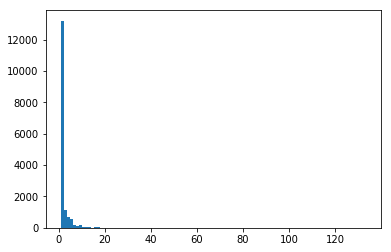

In [60]:
plt.hist([len(i) for i in user_dict.values()],bins=100)
plt.show()

In [82]:
G_full.remove_edges_from(G_full.edges)
for bizs in user_dict.values():
    for a,b in itertools.combinations(bizs, 2):
        if not G_full.has_edge(a,b):
            G_full.add_edge(a,b)
            G_full[a][b]['num_reviews'] = 1
        else:
            G_full[a][b]['num_reviews'] += 1

In [193]:
G_vis = G_full.copy()

In [194]:
G_vis.remove_edges_from([(a,b) for a,b in list(G_vis.edges) if G_vis[a][b]['num_reviews']<10])

In [88]:
cliques = list(nx.find_cliques(G_vis))

In [195]:
G_vis = max(nx.connected_component_subgraphs(G_vis),key=len)

In [209]:
for n in G_vis.nodes:
    G_vis.nodes[n]['rank'] = 1

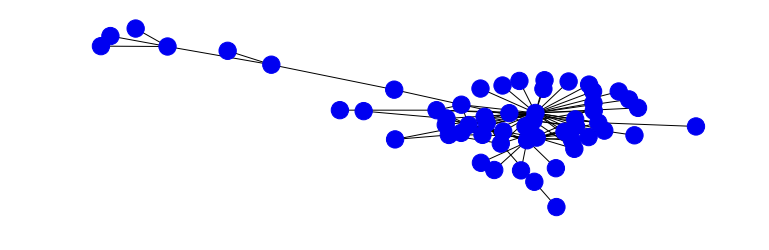

In [198]:
plt.figure(figsize=(10,3))
nx.draw_spring(G_vis, node_color=[plt.cm.jet(G_vis.nodes[n]['rank']/10) for n in G_vis.nodes])

In [216]:
G_temp = G_vis.copy()
lim = 7
count = 2
new_nodes = set([])
for n in G_vis.nodes:
    for _,b in G_full.edges([n]):
        if G_full[n][b]['num_reviews'] > lim and not G_vis.has_edge(n,b):
            G_temp.add_edge(n,b)
            G_temp[n][b]['num_reviews'] = G_full[n][b]['num_reviews']
            new_nodes.add(b)
            G_temp.nodes[b]['rank'] = count
G_vis = G_temp.copy()

In [182]:
plt.figure(figsize=(20,20))
nx.draw_spring(GCCs_2[0], node_color=[plt.cm.jeG_temp.nodes[n]['rank']/3 for n in G_temp.nodes], cmap=plt.cm.jet)

KeyError: 'rank'

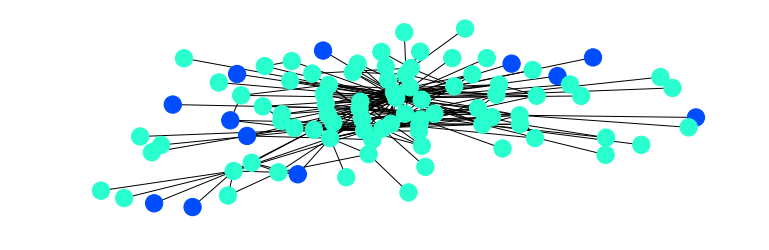

In [220]:
plt.figure(figsize=(10,3))
nx.draw_spring(G_vis, node_color=[plt.cm.jet(G_vis.nodes[n]['rank']/5) for n in G_vis.nodes])

In [ ]:
### Progression of restaurants
G_prog = nx.DiGraph()
G_prog.add_nodes_from(biz_list)